In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

A. Crawling Data

In [2]:
df = pd.read_csv('data/data_real.csv', index_col=0)

print(df.head())

   Unnamed: 0                                             Ulasan  Rating  \
0          59                  Pesanan gx sesuai dgn yg d gambar       2   
1          70  Pengiriman dan respon super cepat. Tpi barang ...       2   
2          95             barang yg dikirim tidak sesuai pesanan       1   
3         117  Php, bilang isi ada diseskripsi pas dipesen be...       1   
4         153    barang jelek copot&#34; terus tmpat taro isinya       2   

      Kategori                                        Nama Produk  Id Produk  \
0  pertukangan                 Isi Staples Tembak 8 mm best guard  133507638   
1  pertukangan                 Isi Staples Tembak 8 mm best guard  133507638   
2  pertukangan                 Isi Staples Tembak 8 mm best guard  133507638   
3  pertukangan  steples tembak / staples tembak kenmaster PROM...   88842566   
4  pertukangan  Staple Gun / Staples Tembak / Staples Jok / He...  209226141   

  Terjual  Id_Toko                                            

In [3]:
df_copy = df.copy()

B. Labeling

In [4]:
label = []
for index, row in df_copy.iterrows():
    if row["Rating"] == 1 or row["Rating"] == 2:
        label.append(0)
    else:
        label.append(1)

df_copy["label"] = label

C. Preprocessing Teks

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1925 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1925 non-null   int64 
 1   Ulasan       1925 non-null   object
 2   Rating       1925 non-null   int64 
 3   Kategori     1925 non-null   object
 4   Nama Produk  1925 non-null   object
 5   Id Produk    1925 non-null   int64 
 6   Terjual      1925 non-null   object
 7   Id_Toko      1925 non-null   int64 
 8   Url          1925 non-null   object
 9   label        1925 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 165.4+ KB


In [6]:
#Mengubah text menjadi lower
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

C1. Normalisasi

In [7]:
norm = {" dgn " : " dengan ", " yg ": " yang "," gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalisasi(x))
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yang d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yang dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


C2. Stopwords

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
#kata yang ingin dipertahankan
kata_negasi = ["tidak"]
#hapus kata negasi dari daftar stopwords
filtered_stop_words_set = set(stop_words) - set(kata_negasi)
#konversi kembali ke list
filtered_stop_words = list(filtered_stop_words_set)

new_array = ArrayDictionary(filtered_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text


df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai yang d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang tida...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


C3. Tokenize

In [9]:
tokenized = df_copy['Ulasan'].apply(lambda x:x.split())
tokenized

0              [pesanan, tidak, sesuai, yang, d, gambar]
1      [pengiriman, respon, super, cepat., tpi, baran...
2              [barang, dikirim, tidak, sesuai, pesanan]
3      [php,, bilang, isi, diseskripsi, pas, dipesen,...
4      [barang, jelek, copot&#34;, terus, tmpat, taro...
                             ...                        
995           [bagus, memuaskan., packing, bagus, cepat]
996             [mantap, pengiriman, cepat, rekomen, ed]
997                        [pengiriman, cepat., lumayan]
998              [belom, dicoba, semoga, oke, barangnya]
999    [barang, cukup, bagus,, respon, bagus., gak, m...
Name: Ulasan, Length: 1925, dtype: object

D. Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(Ulasan):
    do = []
    for w in Ulasan:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head

D1. Menggabungkan kedua attribut

In [11]:
at1 = pd.read_csv('data/databersih2.csv')
at2 = pd.read_csv('data/data_real.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [12]:
result.head()

,Ulasan,label
0,pesan tidak sesuai yang d gambar,0
1,kirim respon super cepat tpi barang tidak sesu...,0
2,barang kirim tidak sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 terus tmpat taro isi,0



E. Menghitung Kata Dengan TF-IDF

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [14]:
Ulasan = result['Ulasan']

In [15]:
Ulasan.isnull().sum()

np.int64(6)

In [16]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [17]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2852


In [18]:
term_fit.vocabulary_

{'pesan': 1979,
 'tidak': 2631,
 'sesuai': 2318,
 'yang': 2835,
 'gambar': 913,
 'kirim': 1305,
 'respon': 2158,
 'super': 2493,
 'cepat': 566,
 'tpi': 2684,
 'barang': 301,
 'kuat': 1376,
 'tembus': 2572,
 'jok': 1167,
 'motor': 1671,
 'php': 1985,
 'bilang': 409,
 'isi': 1105,
 'skripsi': 2377,
 'pas': 1919,
 'sen': 2294,
 'beda': 349,
 'mubajir': 1683,
 'rp50': 2188,
 '000': 1,
 'nyata': 1817,
 'ga': 899,
 'cocok': 596,
 'jelek': 1147,
 'copot': 615,
 '34': 69,
 'terus': 2596,
 'tmpat': 2658,
 'taro': 2546,
 'beli': 360,
 'staples': 2450,
 'gak': 910,
 'jual': 1174,
 'sekali': 2271,
 'pake': 1897,
 'ckckck': 582,
 'baik': 276,
 'kalau': 1204,
 'mau': 1584,
 'ngirim': 1763,
 'periksa': 1973,
 'dulu': 817,
 'gan': 918,
 'kondisi': 1345,
 'layak': 1426,
 'apa': 217,
 'gitu': 956,
 'loh': 1478,
 'karat': 1224,
 'semua': 2293,
 'produk': 2047,
 'order': 1861,
 'prohex': 2051,
 'sdh': 2251,
 'terima': 2588,
 'buat': 485,
 'masang': 1574,
 'datang': 668,
 'cacat': 521,
 'guna': 986,
 'haru

In [19]:
term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16396 stored elements and shape (1925, 2852)>
  Coords	Values
  (0, 913)	1
  (0, 1979)	1
  (0, 2318)	1
  (0, 2631)	1
  (0, 2835)	1
  (1, 301)	1
  (1, 566)	1
  (1, 913)	1
  (1, 1167)	1
  (1, 1305)	1
  (1, 1376)	1
  (1, 1671)	1
  (1, 2158)	1
  (1, 2318)	1
  (1, 2493)	1
  (1, 2572)	1
  (1, 2631)	2
  (1, 2684)	1
  (2, 301)	1
  (2, 1305)	1
  (2, 1979)	1
  (2, 2318)	1
  (2, 2631)	1
  (3, 1)	1
  (3, 349)	1
  :	:
  (1924, 635)	1
  (1924, 734)	1
  (1924, 897)	1
  (1924, 910)	2
  (1924, 918)	1
  (1924, 958)	1
  (1924, 986)	1
  (1924, 1023)	1
  (1924, 1456)	1
  (1924, 1565)	1
  (1924, 1707)	1
  (1924, 1796)	1
  (1924, 1901)	1
  (1924, 1922)	1
  (1924, 1992)	1
  (1924, 2158)	1
  (1924, 2227)	1
  (1924, 2251)	1
  (1924, 2281)	1
  (1924, 2367)	1
  (1924, 2509)	3
  (1924, 2571)	1
  (1924, 2648)	1
  (1924, 2683)	1
  (1924, 2769)	1


In [20]:
ulasan_tf = Ulasan[1]
print(ulasan_tf)

kirim respon super cepat tpi barang tidak sesuai gambar tidak kuat tembus jok motor


In [21]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13 stored elements and shape (1, 2852)>
  Coords	Values
  (0, 301)	1
  (0, 566)	1
  (0, 913)	1
  (0, 1167)	1
  (0, 1305)	1
  (0, 1376)	1
  (0, 1671)	1
  (0, 2158)	1
  (0, 2318)	1
  (0, 2493)	1
  (0, 2572)	1
  (0, 2631)	2
  (0, 2684)	1


In [22]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 2852)>
  Coords	Values
  (0, 301)	0.10027154051632213
  (0, 566)	0.15672491792408422
  (0, 913)	0.2221349772218016
  (0, 1167)	0.38690033106067995
  (0, 1305)	0.14614738349208098
  (0, 1376)	0.3058169193503906
  (0, 1671)	0.38690033106067995
  (0, 2158)	0.19562127475944097
  (0, 2318)	0.1298315011920026
  (0, 2493)	0.3193650461294461
  (0, 2572)	0.38690033106067995
  (0, 2631)	0.300666946079945
  (0, 2684)	0.3233601378913687


F. Visualisasi (NLP)

In [23]:
train_s0 = df_copy[df_copy["label"] == 0]

In [24]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12420\3928391769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")


In [25]:
train_s0.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai yang d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang tida...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [26]:
from wordcloud import WordCloud

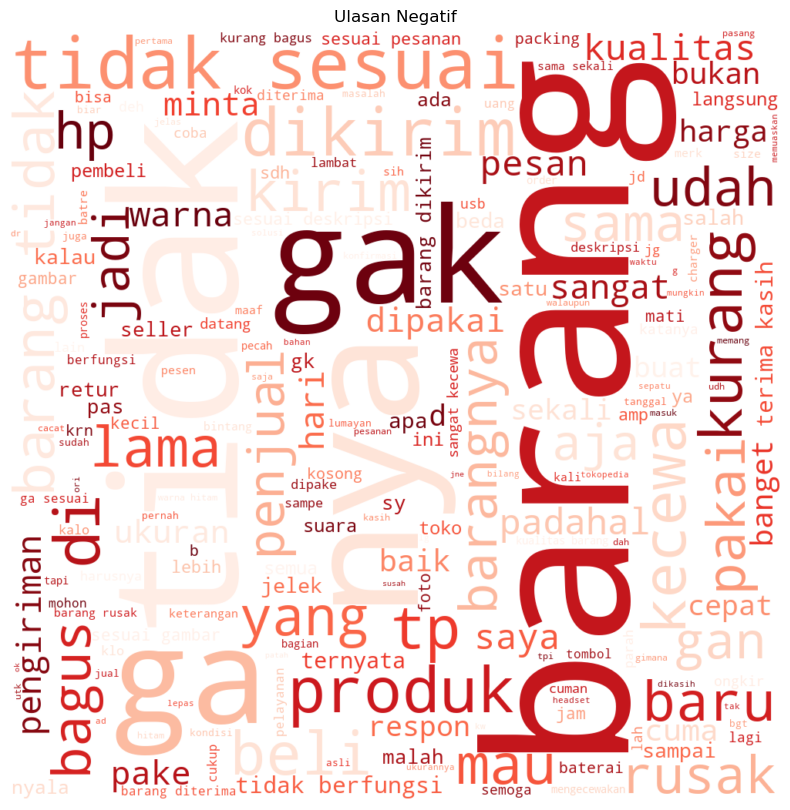

In [27]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [28]:
train_s1 = df_copy[df_copy["label"] == 1]

In [29]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12420\2675054923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")


In [30]:
train_s1.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,1,barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
1,2,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
2,3,paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
3,4,saya puas barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
4,5,responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


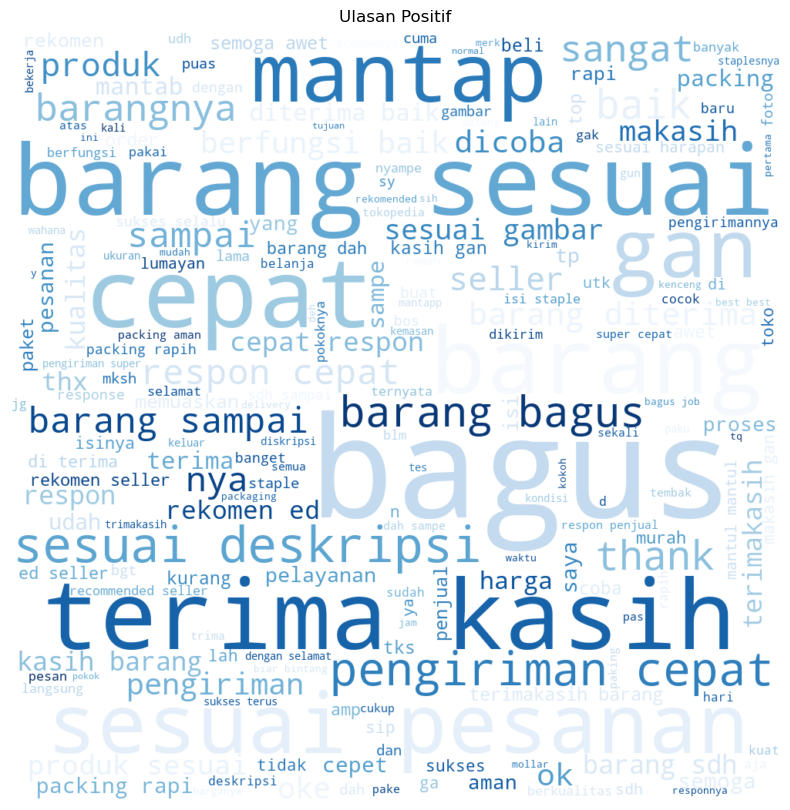

In [31]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12420\1423334625.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

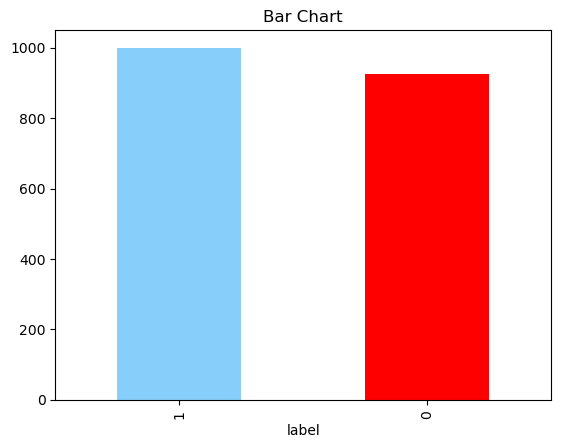

In [32]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show


G. Split Data (TF-IDF)

In [33]:
result['Ulasan'] = result['Ulasan'].fillna("Tidak ada komentar")

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'], test_size=0.1, stratify=result['label'], random_state=30)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [36]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1732, 2715)
(193, 2715)


In [37]:
X_train = X_train.toarray()
X_test = X_test.toarray()

H. Machine Learning

H1. (Naive Bayes Classifier)

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing' : np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method, verbose = 1, scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': np.float64(0.005336699231206307)}

In [40]:
nb = GaussianNB(var_smoothing=0.005336699231206307)

In [41]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.005336699231206307)

In [42]:
y_pred_nb = nb.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay, accuracy_score


In [44]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification_report ------')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[71 22]
 [ 9 91]]
----- classification_report ------
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        93
           1       0.81      0.91      0.85       100

    accuracy                           0.84       193
   macro avg       0.85      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



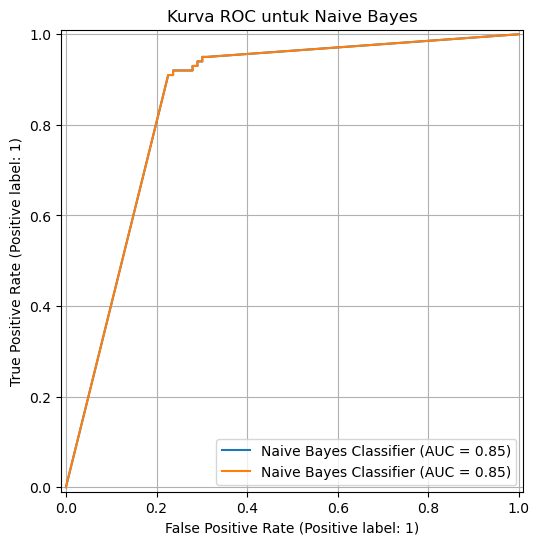

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Asumsi: model Naive Bayes Anda bernama 'nb' dan sudah dilatih
# Asumsi: X_test dan y_test sudah disiapkan

fig, ax = plt.subplots(figsize=(8, 6))

# Cukup panggil ini dengan model dan data test
roc_display = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax, name="Naive Bayes Classifier")
roc_display.plot(ax=ax)

plt.title('Kurva ROC untuk Naive Bayes')
plt.grid(True)
plt.show()

H2. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
model_lr = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')

model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [48]:
y_pred_lr = model_lr.predict(X_test)

In [49]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

Accuracy: 0.9223


In [50]:
# Laporan Klasifikasi (Precision, Recall, F1-Score per kelas)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        93
           1       0.93      0.92      0.92       100

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



In [51]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm_lr)


Confusion Matrix:
[[86  7]
 [ 8 92]]


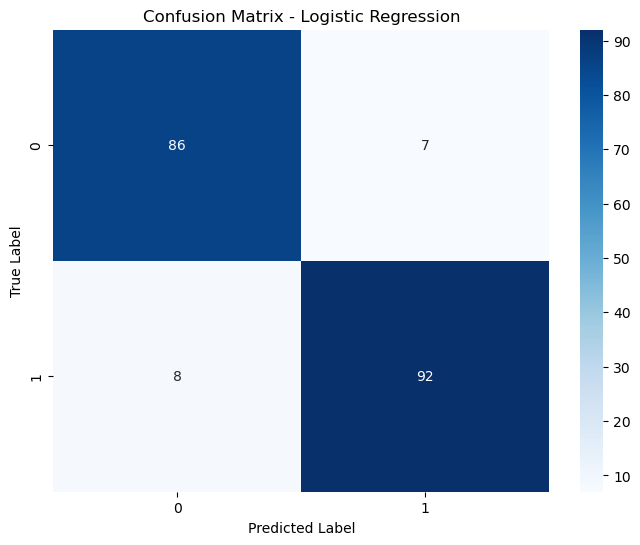

In [52]:
# --- 5. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

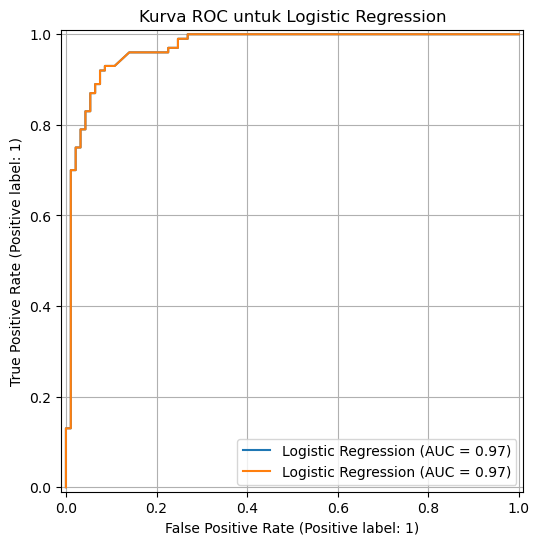

In [53]:
# --- 6. Plot ROC Curve ---
# Pastikan model_lr memiliki predict_proba atau decision_function
# Logistic Regression memiliki predict_proba secara default
fig, ax = plt.subplots(figsize=(8, 6))
roc_display_lr = RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=ax, name="Logistic Regression")
roc_display_lr.plot(ax=ax)
plt.title('Kurva ROC untuk Logistic Regression')
plt.grid(True)
plt.show()

H3. Support Vector Machine

In [54]:
from sklearn.svm import LinearSVC 

In [55]:
model_svc = LinearSVC(random_state=42, max_iter=10000, dual=False)

model_svc.fit(X_train, y_train)


LinearSVC(dual=False, max_iter=10000, random_state=42)

In [56]:
y_pred_svc = model_svc.predict(X_test)

In [57]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc:.4f}")

Accuracy: 0.9223


In [58]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        93
           1       0.92      0.93      0.93       100

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



In [59]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix:")
print(cm_svc)


Confusion Matrix:
[[85  8]
 [ 7 93]]


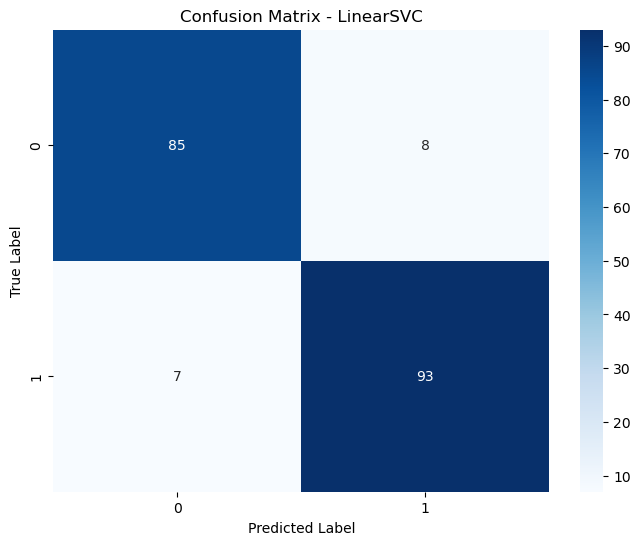

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_svc.classes_, yticklabels=model_svc.classes_)
plt.title('Confusion Matrix - LinearSVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

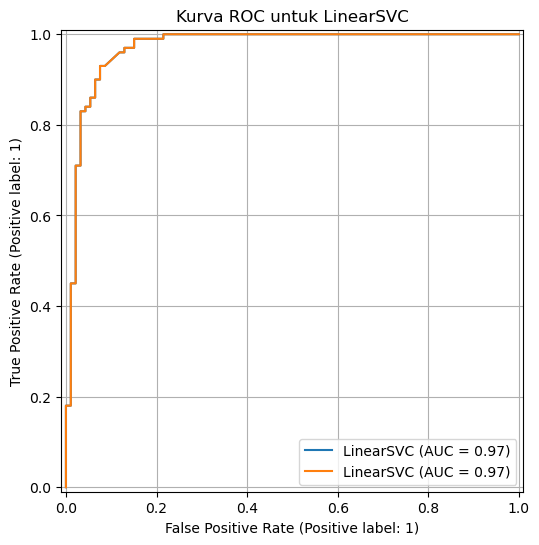

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
roc_display_svc = RocCurveDisplay.from_estimator(model_svc, X_test, y_test, ax=ax, name="LinearSVC")
roc_display_svc.plot(ax=ax)
plt.title('Kurva ROC untuk LinearSVC')
plt.grid(True)
plt.show()

Evaluasi Model dengan K-Fold Cross-Validation

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [63]:
ulasan = result['Ulasan'].fillna("Tidak ada komentar")

X_tfidf = vectorizer.fit_transform(ulasan)
X_tfidf_array = X_tfidf.toarray()

y = result['label']

In [64]:
#model
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing' : np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method, verbose = 1, scoring = 'accuracy')

gscv_nb.fit(X_tfidf_array, y)
gscv_nb.best_params_


nb = GaussianNB(var_smoothing=0.005336699231206307)
model_lr = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
model_svc = LinearSVC(random_state=42, max_iter=10000, dual=False)


models = {
'Logistic Regression': model_lr,
'Support Vector Machine': model_svc,
'Gaussian Naive Bayes': nb
}



Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [65]:
# 2. Definisikan skema cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
results = {}

# Lakukan iterasi untuk setiap model
for model_name, model in models.items():
    scores = cross_val_score(model, X_tfidf_array, y, cv=skf, scoring='accuracy')
    
    # Simpan hasilnya
    results[model_name] = scores
    
    # Cetak hasil untuk setiap model
    print(f"--- {model_name} ---")
    print(f"Skor di setiap lipatan: {scores}")
    print(f"Akurasi Rata-rata: {np.mean(scores):.3f}")
    print(f"Standar Deviasi: {np.std(scores):.3f}")
    print("\n")

--- Logistic Regression ---
Skor di setiap lipatan: [0.8961039  0.8961039  0.88051948 0.9038961  0.87792208]
Akurasi Rata-rata: 0.891
Standar Deviasi: 0.010


--- Support Vector Machine ---
Skor di setiap lipatan: [0.8961039  0.91428571 0.9038961  0.92727273 0.89350649]
Akurasi Rata-rata: 0.907
Standar Deviasi: 0.012


--- Gaussian Naive Bayes ---
Skor di setiap lipatan: [0.81038961 0.86493506 0.85974026 0.87272727 0.83116883]
Akurasi Rata-rata: 0.848
Standar Deviasi: 0.023




Hyperparameter Tuning untuk SVM

In [67]:
svm_base = LinearSVC(random_state=42, max_iter=10000, dual=False)
params_svm = {
    'C': [0.1, 1, 10, 100]
}

In [68]:
gscv_svm = GridSearchCV(
    estimator=svm_base,
    param_grid=params_svm,
    cv=skf,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [69]:
gscv_svm.fit(X_tfidf_array, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearSVC(dual=False, max_iter=10000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy',
             verbose=2)

In [72]:
print("Parameter terbaik:", gscv_svm.best_params_)

print(f"Skor akurasi terbaik (cross-validated): {gscv_svm.best_score_:.4f}")


Parameter terbaik: {'C': 1}
Skor akurasi terbaik (cross-validated): 0.9070


Setelah melalui proses evaluasi menggunakan 5-Fold Cross-Validation dan optimasi menggunakan Hyperparameter Tuning (GridSearchCV), model Support Vector Machine (SVM) terbukti menjadi model terbaik. Pengaturan parameter optimalnya adalah C=1, yang menghasilkan akurasi rata-rata cross-validation yang stabil dan terverifikasi sebesar 90.7%.